In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer



In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


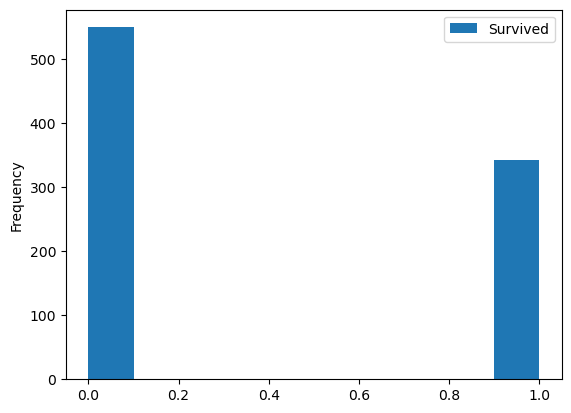

In [27]:
df.plot(kind = 'hist', x = 'Age', y = 'Survived')

plt.show()

In [33]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [31]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [35]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
X=df.iloc[:,1:3]

In [55]:
y=df.iloc[:,0]

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

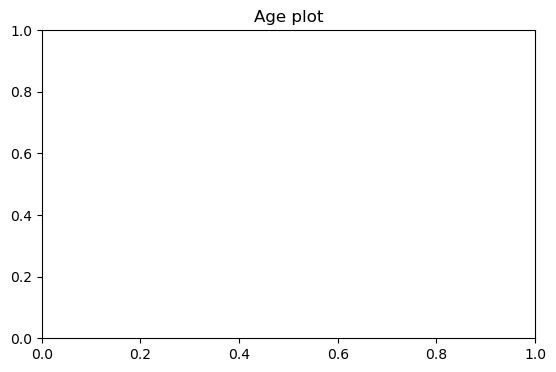

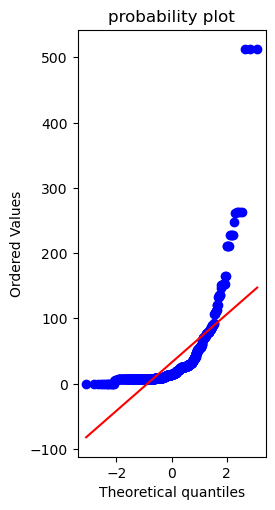

In [107]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Age plot')
sns.displot(X_train['Fare'])

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('probability plot')
plt.show()

In [115]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [119]:
print("accuracy score is" ,accuracy_score(y_test,y_pred))

accuracy score is 0.6480446927374302


In [136]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_dt_pred=dt.predict(X_test)

In [138]:
print("accuracy score is" ,accuracy_score(y_test,y_dt_pred))

accuracy score is 0.6815642458100558


In [142]:
trf=FunctionTransformer(func=np.log1p)

In [144]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [150]:
lr2=LogisticRegression()
lr2.fit(X_train_transformed,y_train)
y_pred2=lr2.predict(X_test_transformed)

In [152]:
print("accuracy score is" ,accuracy_score(y_test,y_pred2))

accuracy score is 0.6815642458100558


In [158]:
dt1=DecisionTreeClassifier()
dt1.fit(X_train_transformed,y_train)
y_pred3=dt1.predict(X_test_transformed)

In [160]:
print("accuracy score is" ,accuracy_score(y_test,y_pred3))

accuracy score is 0.6871508379888268
